In [1]:
(ext:chdir "~/Development/clasp/extensions/cando/src/lisp/tests/boron/" t)

-1

In [13]:
(leap.core::clear-path)
(add-path "~/Development/clasp/extensions/cando/src/tests/boron/")
(add-path "~/Development/amber16/dat/leap/cmd/")
(add-path "~/Development/amber16/dat/leap/lib/")
(add-path "~/Development/amber16/dat/leap/parm/")
(add-path "~/Development/amber16/dat/leap/prep/")
(add-path "~/Development/amber16/dat/antechamber/")

(#P"/Users/tuj24515/Development/amber16/dat/antechamber/"
 #P"/Users/tuj24515/Development/amber16/dat/leap/prep/"
 #P"/Users/tuj24515/Development/amber16/dat/leap/parm/"
 #P"/Users/tuj24515/Development/amber16/dat/leap/lib/"
 #P"/Users/tuj24515/Development/amber16/dat/leap/cmd/"
 #P"/Users/tuj24515/Development/clasp/extensions/cando/src/tests/boron/")

In [3]:
(start-swank)

swank-loader -> /Users/tuj24515/Development/slime/swank-loader.lisp

"Read: (DEFPACKAGE :SWANK-LOADER (:USE :CL) (:EXPORT :INIT :DUMP-IMAGE :LIST-FASLS :*SOURCE-DIRECTORY* :*FASL-DIRECTORY*))
" 
"Read: (IN-PACKAGE :SWANK-LOADER)
" 
"Read: (DEFVAR *SOURCE-DIRECTORY* (MAKE-PATHNAME :NAME NIL :TYPE NIL :DEFAULTS (OR *LOAD-PATHNAME* *DEFAULT-PATHNAME-DEFAULTS*)) The directory where to look for the source.)
" 
"Read: (DEFPARAMETER *SYSDEP-FILES* (QUOTE ((SWANK CLASP) (SWANK GRAY))))
" 
"Read: (DEFPARAMETER *IMPLEMENTATION-FEATURES* (QUOTE (:ALLEGRO :LISPWORKS :SBCL :CLOZURE :CMU :CLISP :CCL :CORMAN :CORMANLISP :ARMEDBEAR :GCL :ECL :SCL :MKCL :CLASP)))
" 
"Read: (DEFPARAMETER *OS-FEATURES* (QUOTE (:MACOSX :LINUX :WINDOWS :MSWINDOWS :WIN32 :SOLARIS :DARWIN :SUNOS :HPUX :UNIX)))
" 
"Read: (DEFPARAMETER *ARCHITECTURE-FEATURES* (QUOTE (:POWERPC :PPC :X86 :X86-64 :X86_64 :AMD64 :I686 :I586 :I486 :PC386 :IAPX386 :SPARC64 :SPARC :HPPA64 :HPPA :ARM :ARMV5L :ARMV6L :ARMV7L :ARM64 :PENTIUM3 :PENTIUM4 

T

Load the GAFF force field and boronic ester frcmod file.

In [30]:
(clear-force-field)
(load-atom-type-rules "ATOMTYPE_GFF.DEF")

(#<FORCE-FIELD ATOMTYPE_GFF.DEF>)

In [31]:
(load-amber-params "gaff.dat")

SIMPLE-WARNING: 
Warning!  Skipping 10-12 hbond
SIMPLE-WARNING: 
Warning!  Skipping force field atom equivalences


#<FORCE-FIELD gaff.dat>

In [32]:
(load-atom-type-rules "boron.def")

(#<FORCE-FIELD boron.def> #<FORCE-FIELD gaff.dat>
 #<FORCE-FIELD ATOMTYPE_GFF.DEF>)

In [33]:
(load-amber-params "frcmod.boronic-ester")
(gethash :default leap.core::*force-fields*)

(#<FORCE-FIELD frcmod.boronic-ester> #<FORCE-FIELD boron.def>
 #<FORCE-FIELD gaff.dat> #<FORCE-FIELD ATOMTYPE_GFF.DEF>)

Display a prototypical aryl boronic ester.

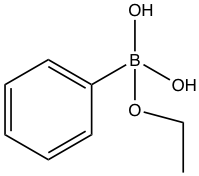

In [20]:
(cl-jupyter-user:png-from-file "arylboronate2d.png")

Load the arylboronic ester from a Chemdraw file.

In [21]:
(defparameter *chemagg* (cando:load-chem-draw-aggregate "arylboronate.cdxml"))

*CHEMAGG*

In [22]:
(build-hydrogens *chemagg*)

NIL

Draw the 2D representation of the molecule loaded from the Chemdraw file.

In [23]:
(nglv::show-aggregate *chemagg*)

A Jupyter Widget

In [24]:
(:= *ff* (leap.core::merged-force-field))

SIMPLE-WARNING: 
Implement merge of FFVdwDb
SIMPLE-WARNING: 
Implement merge of FFVdwDb
SIMPLE-WARNING: 
Implement merge of FFVdwDb
SIMPLE-WARNING: 
Implement merge of FFVdwDb


*FF*

Automatically assign atom types.

In [25]:
(chem:assign-types *ff* *chemagg*)

NIL

In [26]:
(jostle *chemagg*)

NIL

Atomatically assign force-field parameters and minimize the energy of the molecule.

In [27]:
(energy:minimize *chemagg* :force-field *ff* :restraints-on nil)

======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minSDnP       0     1  0.000000   0.0              0.000          16734.692
 minSDnP       0     2  0.000303   0.0        2765982.651           7455.396
 minSDnP       0     3  0.000361   0.0        2041859.297           5393.469
DONE absolute force test:
forceRmsMag(4262.681667).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
 minCGnP       0     4  0.000000   0.0              0.000           4262.682
 minCGnP       0     5  0.000391  42.0        1421068.053           3844.529
 minCGnP       0     6  0.001572  39.1         631776.000           1962.937
 minCGnP       0     7  0.000861  54.1         514705.359           2098.625
 minCGnP       0     8  0.000385  68.9         449966.853           3117.709
 minCGnP       0     9  0.000125  49.7         418139.457           1839.865
 minCGnP       0    10  0.000684  56.9         327163.440 

#<ENERGY-FUNCTION >

Visualize the minimized structure and demonstrate that the force field parameters lead to the construction of a chemically reasonable structure.

In [28]:
(nglv::show-aggregate *chemagg*)

A Jupyter Widget

In [34]:
(chem:assign-types *ff* *chemagg*)

NIL

In [38]:
(chem:set-property *chemagg* :bounding-box '(30.0 30.0 30.0))

NIL

In [41]:
(leap.topology:save-amber-parm-format *chemagg* "boronic-ester.top" "boronic-ester.crd" *ff* :assign-types nil)

atom1: #<ATOM :C_118/:C> atom2: #<ATOM :C_116/:C> i1: 0 i2: 3
 atom1: #<ATOM :C_116/:C> atom2: #<ATOM :C_114/:C> i1: 3 i2: 12
 atom1: #<ATOM :C_120/:C> atom2: #<ATOM :C_118/:C> i1: 6 i2: 0
 atom1: #<ATOM :C_120/:C> atom2: #<ATOM :C_110/:C> i1: 6 i2: 15
 atom1: #<ATOM :C_120/:C> atom2: #<ATOM :H_120/:H> i1: 6 i2: 60
 atom1: #<ATOM :B/:B> atom2: #<ATOM :C_118/:C> i1: 9 i2: 0
 atom1: #<ATOM :C_114/:C> atom2: #<ATOM :C_112/:C> i1: 12 i2: 27
 atom1: #<ATOM :OH/:O> atom2: #<ATOM :B/:B> i1: 18 i2: 9
 atom1: #<ATOM :OH/:O> atom2: #<ATOM :HH/:H> i1: 18 i2: 69
 atom1: #<ATOM :OH/:O> atom2: #<ATOM :B/:B> i1: 21 i2: 9
 atom1: #<ATOM :OH/:O> atom2: #<ATOM :HH/:H> i1: 21 i2: 66
 atom1: #<ATOM :O/:O> atom2: #<ATOM :B/:B> i1: 24 i2: 9
 atom1: #<ATOM :C_112/:C> atom2: #<ATOM :C_110/:C> i1: 27 i2: 15
 atom1: #<ATOM :C_142/:C> atom2: #<ATOM :O/:O> i1: 30 i2: 24
 atom1: #<ATOM :C_142/:C> atom2: #<ATOM :H_1421/:H> i1: 30 i2: 45
 atom1: #<ATOM :C_142/:C> atom2: #<ATOM :H_1422/:H> i1: 30 i2: 48
 atom1: #<ATO

0

In [29]:
(defparameter *cat* (cando:load-chem-draw-aggregate "spiroligomer transglycosylase copy.cdxml"))

SIMPLE-ERROR: 
Could not find file spiroligomer transglycosylase copy.cdxml


NIL

In [117]:
(build-hydrogens *cat*)

NIL

In [118]:
(nglv::show-aggregate *cat*)

A Jupyter Widget

In [119]:
(progn
  (defparameter *stereocenters*
    (sort (cando:gather-stereocenters *cat*) #'string< :key #'chem:get-name))
  (cando:set-stereoisomer-func *stereocenters* (constantly :S) :show t)
  (let ((quat-matcher (core:make-cxx-object 'chem:chem-info)))
    (chem:compile-smarts quat-matcher "[C&H0&D4]")
    (chem:map-atoms nil (lambda (a) (when (chem:matches quat-matcher a)
                  (chem:set-configuration a :S)
                  (format t "Set atom ~a to :S~%" (chem:get-name a))))
            *cat*)))

C_108  S
C_110  S
C_133  S
C_135  S
C_158  S
C_160  S
C_183  S
C_185  S
C_208  S
C_210  S
C_303  S
C_305  S
C_313  S
C_315  S
C_323  S
C_325  S
C_333  S
C_335  S
C_343  S
C_345  S
C_500  S
Set atom C_305 to :S
Set atom C_315 to :S
Set atom C_325 to :S
Set atom C_210 to :S
Set atom C_335 to :S
Set atom C_185 to :S
Set atom C_345 to :S
Set atom C_160 to :S
Set atom C_135 to :S
Set atom C_110 to :S


NIL

In [120]:
(chem:assign-types *ff* *cat*)

NIL

In [121]:
(jostle *cat*)

NIL

In [122]:
(energy:minimize *cat* :force-field *ff* :restraints-on t)

SIMPLE-PROGRAM-ERROR: 
Could not find FFNonbondDb type index for type :B


NIL

In [12]:
(start-swank)

swank-loader -> /Users/tuj24515/Development/slime/swank-loader.lisp

"Read: (DEFPACKAGE :SWANK-LOADER (:USE :CL) (:EXPORT :INIT :DUMP-IMAGE :LIST-FASLS :*SOURCE-DIRECTORY* :*FASL-DIRECTORY*))
" 
"Read: (IN-PACKAGE :SWANK-LOADER)
" 
"Read: (DEFVAR *SOURCE-DIRECTORY* (MAKE-PATHNAME :NAME NIL :TYPE NIL :DEFAULTS (OR *LOAD-PATHNAME* *DEFAULT-PATHNAME-DEFAULTS*)) The directory where to look for the source.)
" 
"Read: (DEFPARAMETER *SYSDEP-FILES* (QUOTE ((SWANK CLASP) (SWANK GRAY))))
" 
"Read: (DEFPARAMETER *IMPLEMENTATION-FEATURES* (QUOTE (:ALLEGRO :LISPWORKS :SBCL :CLOZURE :CMU :CLISP :CCL :CORMAN :CORMANLISP :ARMEDBEAR :GCL :ECL :SCL :MKCL :CLASP)))
" 
"Read: (DEFPARAMETER *OS-FEATURES* (QUOTE (:MACOSX :LINUX :WINDOWS :MSWINDOWS :WIN32 :SOLARIS :DARWIN :SUNOS :HPUX :UNIX)))
" 
"Read: (DEFPARAMETER *ARCHITECTURE-FEATURES* (QUOTE (:POWERPC :PPC :X86 :X86-64 :X86_64 :AMD64 :I686 :I586 :I486 :PC386 :IAPX386 :SPARC64 :SPARC :HPPA64 :HPPA :ARM :ARMV5L :ARMV6L :ARMV7L :ARM64 :PENTIUM3 :PENTIUM4 

T

In [6]:
(load-off "tip3pfbox.off")

NIL

In [5]:
(nglv::show-aggregate ~tip3pfbox)

A Jupyter Widget

In [7]:
(print ~tip3pfbox)


AGGREGATE 

AGGREGATE

In [4]:
(defparameter *solvent* ~tip3pfbox)

*SOLVENT*

In [5]:
*solvent*

AGGREGATE

In [8]:
(chem:map-atoms nil (lambda (r) (print r)) *solvent*)


#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O

NIL

In [14]:
(chem:map-residues nil (lambda (r) (print r)) ~tip3pfbox)


#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WA

NIL

In [21]:
(leap.solvant::tool-find-close-solute-atoms *solvent*)

Reader error: Package error on package "LEAP.SOLVANT" (condition of type PACKAGE-ERROR)


NIL

In [14]:
(print ~tip3pfbox)


AGGREGATE 

AGGREGATE